# Programming Assignment 1
# MATH-UA 250 Mathematics of Finance
# Portfolio Management

In [71]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


# Useful Python code

https://pandas.pydata.org/pandas-docs/stable/10min.html
https://pandas.pydata.org/pandas-docs/stable/visualization.html


In [72]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#  File Contents
Returns to the following asset classes are contained in the file
 * "MSCI WORLD"
 * "MSCI AC WORLD"    
 * "MSCI EUROPE"
 * "MSCI EM"
 * "MSCI EAFE"        
 * "MSCI PACIFIC"
 * "MSCI USA"
 * "Treasury.Bond.10Y"
 * "Treasury.Bill.90D"


 <span style="color:blue">Our set of risky assets for the analysis is  MSCI EUROPE, MSCI USA , MSCI PACIFIC, Treasury.Bond.10Y </span>


In [73]:
# Read in the data from computer
# inpath  = "C:\\Users\\hanna\\OneDrive\\Desktop\\MathFinance\\"
# infile  = "ReturnsPortfolios.csv"
# print(inpath+infile)
# indata = pd.read_csv(inpath + infile)

# Alternatively, read data from online
url = 'https://raw.githubusercontent.com/hannayu/Math-Finance/main/ReturnsPortfolios.csv'
indata = pd.read_csv(url)

In [74]:
indata.head(5)

,Date,MSCI WORLD,MSCI AC WORLD,MSCI EUROPE,MSCI EM,MSCI EAFE,MSCI PACIFIC,MSCI USA,Treasury.Bond.10Y,Treasury.Bill.90D,Treasury.Bill.30D
0,1/29/1988,0.024592,0.025330,-0.040626,0.098380,0.018081,0.049747,0.042834,0.044235,0.005001,0.002762
1,2/29/1988,0.058224,0.058079,0.059266,0.003396,0.066914,0.070676,0.041869,0.013917,0.005349,0.004564
2,3/31/1988,0.030382,0.031100,0.027948,0.107385,0.061675,0.078041,-0.033456,-0.019930,0.004803,0.004402
3,4/29/1988,0.012798,0.012980,0.019014,0.053382,0.014717,0.012751,0.009184,-0.012511,0.004554,0.004577
4,5/31/1988,-0.019802,-0.019521,-0.018278,0.029962,-0.031833,-0.038039,0.008603,-0.015848,0.005027,0.005051


In [75]:
RiskyAsset     = ["MSCI EUROPE","MSCI USA","MSCI PACIFIC","Treasury.Bond.10Y"]
RiskFreeAsset  = "Treasury.Bill.90D"

In [76]:
# print out first 3 rows and all columns of risky assets
indata.loc[1:3,RiskyAsset]

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
1,0.059266,0.041869,0.070676,0.013917
2,0.027948,-0.033456,0.078041,-0.019930
3,0.019014,0.009184,0.012751,-0.012511



## <span style="color:blue">Part 1: Risky Assets Analysis</span>

 Create a table calculating 1-6 for the risky assets:
1.  mean
2.	median
3.	standard deviations 
4.	skew 
5.	kurtosis
6.  return - risk ratio 

Plot the assets classes on a return - risk graph.
Write up a paragraph comparing the statistics of the risky assets.


In [77]:
#1 mean
AnalysisTable = pd.DataFrame(data = indata[RiskyAsset].mean(), 
                             columns = ['mean']).T

#2 median
median = pd.DataFrame(data = indata[RiskyAsset].median(), 
                      columns = ['median']).T
AnalysisTable = AnalysisTable.append(median)

#3 standard deviations
std = pd.DataFrame(data = indata[RiskyAsset].std(), 
                   columns = ['standard deviation']).T
AnalysisTable = AnalysisTable.append(std)

#4 skew
skew = pd.DataFrame(data = indata[RiskyAsset].skew(), 
                    columns = ['skew']).T
AnalysisTable = AnalysisTable.append(skew)

#5 kurtosis
kurtosis = pd.DataFrame(data = indata[RiskyAsset].kurtosis(), 
                        columns = ['kurtosis']).T
AnalysisTable = AnalysisTable.append(kurtosis)

# 6 return-risk ratio
rr = pd.DataFrame(data = indata[RiskyAsset].mean()/
                        indata[RiskyAsset].std(), columns = ['return-risk ratio']).T
AnalysisTable = AnalysisTable.append(rr)

AnalysisTable

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
mean,0.007798,0.009155,0.003608,0.005627
median,0.010439,0.012908,0.001994,0.005221
standard deviation,0.049996,0.041358,0.055957,0.019887
skew,-0.487418,-0.565864,0.003849,-0.009944
kurtosis,1.274753,1.218349,0.874957,0.839616
return-risk ratio,0.155978,0.221373,0.064470,0.282970


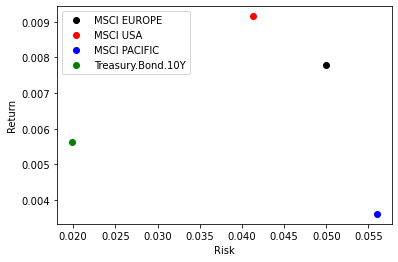

In [78]:
#7 plot the assets classes on a return-risk graph
plt.plot(indata["MSCI EUROPE"].std(), indata["MSCI EUROPE"].mean(), 'ko', label='MSCI EUROPE')
plt.plot(indata["MSCI USA"].std(), indata["MSCI USA"].mean(), 'ro', label='MSCI USA')
plt.plot(indata["MSCI PACIFIC"].std(), indata["MSCI PACIFIC"].mean(), 'bo', label='MSCI PACIFIC')
plt.plot(indata["Treasury.Bond.10Y"].std(), indata["Treasury.Bond.10Y"].mean(), 'go', label='Treasury.Bond.10Y')

plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend()

Comparing the statistics of the risky assets:

The 10-year Treasury bond has the lowest risk among our assets. MSCI Pacific has the highest risk and also the lowest mean return, making it an unfavorable investment. MSCI USA brings the highest mean return.

The skew of a distribution is a measure of how symmetric the distribution is. The normal distribution has a skew of 0. Among our asset classes, MSCI Pacific has the skew closest to 0, so it is the most symmetric. To be specific, the kurtosis we calculated is in fact the excess kurtosis. The excess kurtosis for a standard normal distribution is 0. Positive kurtosis means a distribution is heavy-tailed while negative kurtosis means a distrubution is light-tailed. All our asset class distrubutions are positive. The most heavy-tailed is MSCI Europe.


## <span style="color:blue">Part 2:  Distributions </span>
Plot the distributions for each asset class

Compare the distribution

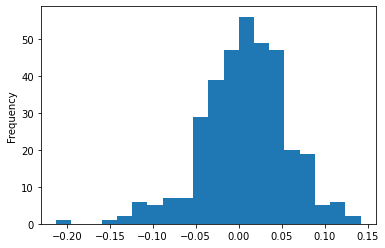

In [79]:
indata["MSCI EUROPE"].plot.hist(stacked=True, bins=20)

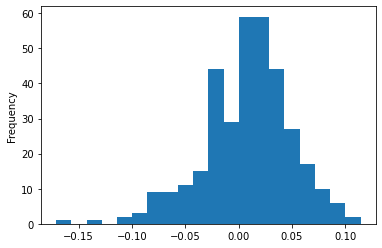

In [80]:
indata["MSCI USA"].plot.hist(stacked=True, bins=20)

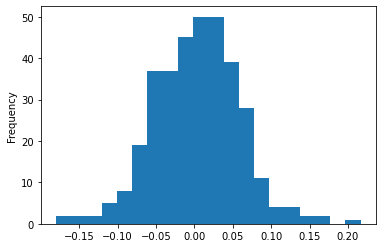

In [81]:
indata["MSCI PACIFIC"].plot.hist(stacked=True, bins=20)

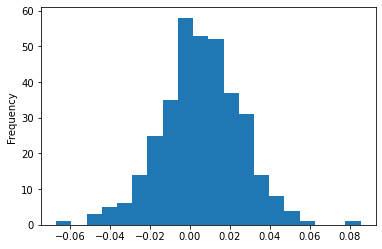

In [82]:
indata["Treasury.Bond.10Y"].plot.hist(stacked=True, bins=20)

## <span style="color:blue"> Part 3: Covariance and Correlation Matrices  </span>

 1.	Calculate the covariance matrix 
 2. Calculate the correlation matrix
 3.	Verify the covariance matrix is non-singular
 4.	Verify the covariance matrix is symmetric and positive definite


In [83]:
#1
covariance = indata[RiskyAsset].cov()
covariance

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
MSCI EUROPE,0.002500,0.001616,0.001813,-0.000097
MSCI USA,0.001616,0.001710,0.001247,-0.000039
MSCI PACIFIC,0.001813,0.001247,0.003131,-0.000035
Treasury.Bond.10Y,-0.000097,-0.000039,-0.000035,0.000395


In [84]:
#2
correlation = indata[RiskyAsset].corr()
correlation

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,Treasury.Bond.10Y
MSCI EUROPE,1.000000,0.781742,0.647950,-0.097888
MSCI USA,0.781742,1.000000,0.538701,-0.047390
MSCI PACIFIC,0.647950,0.538701,1.000000,-0.031418
Treasury.Bond.10Y,-0.097888,-0.047390,-0.031418,1.000000


In [85]:
#3 Verify the covariance matrix is non-singular (determinant is positive)
np.linalg.det(covariance)

1.1732008469285679e-12

In [86]:
#4 Verify the covariance matrix is symmetric and positive definite
print(np.linalg.det(covariance))
print(np.linalg.det(covariance.loc[["MSCI EUROPE","MSCI USA","MSCI PACIFIC"],["MSCI EUROPE","MSCI USA","MSCI PACIFIC"]]))
print(np.linalg.det(covariance.loc[["MSCI EUROPE","MSCI USA"],["MSCI EUROPE","MSCI USA"]]))
print(np.linalg.det(covariance.loc[["MSCI EUROPE"],["MSCI EUROPE"]]))

1.1732008469285679e-12
3.0064730764628797e-09
1.6626298326831731e-06
0.0024995822500577585


We know by observation that the covariance matrix is symmetric. A symmetric matrix is positive definite if all upper left kxk determinants of a symmetric matrix are positive. The values in the output show that they are.

## <span style="color:blue">Part 4: Calculate the weights, returns and risks for the following portfolios     </span>
 1.	Minimum variance portfolio
 2. Portfolio with expected return of 9% and minimum variance
 3. Efficicent frontier (calculate the weights, returns and risk of at least 7 portfolios)
 4. Plot the portfolios and asset classes on a graph
 5. Plot an equal weighted portolio on the graph
 6. What is the expected return and risk of the minimum variance portfolio
  

In [87]:
# 1. Minimum variance portfolio

C = covariance.to_numpy()
u = np.array([[1, 1, 1, 1]])
C_inv = np.linalg.inv(C)
numerator = np.matmul(u,C_inv)
denominator = np.matmul(u,np.matmul(C_inv,u.transpose()))

w = numerator/denominator # weights
print("weights =", w)

m = (indata[RiskyAsset].mean()).to_numpy()
m = np.array([m])
r = np.matmul(w,m.transpose())[0,0]
print("return =", r)

var = np.matmul(w,np.matmul(C,w.transpose()))
sigma = np.sqrt(var)[0,0]
print("risk =", sigma)

weights = [[0.05030877 0.12979729 0.02500862 0.79488532]]
return = 0.006143974980755603
risk = 0.01742209834422105


In [88]:
# 2. Portfolio with expected return of 9% (mu = 0.09) and minimum variance

# Find lamdas
a = np.matmul(m,np.matmul(C_inv, m.transpose()))[0,0]
b = np.matmul(u,np.matmul(C_inv, m.transpose()))[0,0]
c = np.matmul(m,np.matmul(C_inv, u.transpose()))[0,0]
d = np.matmul(u,np.matmul(C_inv, u.transpose()))[0,0]
M = np.array([[a, b], [c, d]])
M_inv = np.linalg.inv(M)
lambdas = np.matmul(M_inv, np.array([[0.09],[1]]))*2
lambda1 = lambdas[0,0]
lambda2 = lambdas[1,0]

# Calculate weights
weights = (lambda1*np.matmul(m,C_inv) + lambda2*np.matmul(u,C_inv))/2
print("weights:", weights)

# Verify
print("sum of weights:", np.sum(weights))
print("mean:", np.matmul(weights,m.transpose())[0,0])

weights: [[  0.66036403  16.99526494 -11.37623988  -5.27938909]]
sum of weights: 1.0000000000000053
mean: 0.08999999999999991


In [89]:
# 3. Efficicent frontier (calculate the weights, returns and risk of at
# least 7 portfolios)
# Note that only the portfolios with returns above the MVP return are
# on the efficient frontier

# Portfolio 1: Let l1 = 0. This portfolio lies on the MVL.
print("Portfolio 1")
w1 = np.matmul(u, C_inv)
w1 = w1/np.sum(w1) #normalize
print("weights =", w1)
r1 = np.matmul(w1,m.transpose())
r1 = r1[0,0]
print("return =", r1)
var1 = np.matmul(w1,np.matmul(C,w1.transpose()))
sigma1 = np.sqrt(var1)[0,0]
print("risk =", sigma1)

# Portfolio 2: Let l2 = 0. This portfolio lies on the MVL.
print("\nPortfolio 2")
w2 = np.matmul(m, C_inv)
w2 = w2/np.sum(w2)
print("weights =", w2)
r2 = np.matmul(w2,m.transpose())[0,0]
print("return =", r2)
var2 = np.matmul(w2,np.matmul(C,w2.transpose()))
sigma2 = np.sqrt(var2)[0,0]
print("risk =", sigma2)

# Portfolio 3: Combine Portfolios 1 and 2 using weights [0.5, 0.5]
print("\nPortfolio 3")
w3 = 0.5*w1 + 0.5*w2
print("weights =", w3)
r3 = np.matmul(w3,m.transpose())[0,0]
print("return =", r3)
var3 = np.matmul(w3,np.matmul(C,w3.transpose()))
sigma3 = np.sqrt(var3)[0,0]
print("risk =", sigma3)

# Portfolio 4: Combine Portfolios 1 and 2 using weights [-1, 2]
print("\nPortfolio 4")
w4 = -1*w1 + 2*w2
print("weights =", w4)
r4 = np.matmul(w4,m.transpose())[0,0]
print("return =", r4)
var4 = np.matmul(w4,np.matmul(C,w4.transpose()))
sigma4 = np.sqrt(var4)[0,0]
print("risk =", sigma4)

# Portfolio 5: Combine Portfolios 1 and 2 using weights [-.5, 1.5]
print("\nPortfolio 5")
w5 = -.5*w1 + 1.5*w2
print("weights =", w5)
r5 = np.matmul(w5,m.transpose())[0,0]
print("return =", r5)
var5 = np.matmul(w5,np.matmul(C,w5.transpose()))
sigma5 = np.sqrt(var5)[0,0]
print("risk =", sigma5)

# Portfolio 6: Combine Portfolios 1 and 2 using weights [1.5, -.5]
print("\nPortfolio 6")
w6 = 1.5*w1 - .5*w2
print("weights =", w6)
r6 = np.matmul(w6,m.transpose())[0,0]
print("return =", r6)
var6 = np.matmul(w6,np.matmul(C,w6.transpose()))
sigma6 = np.sqrt(var6)[0,0]
print("risk =", sigma6)

# Portfolio 7: Combine Portfolios 1 and 2 using weights [2, -1]
print("\nPortfolio 7")
w7 = 2*w1 - 1*w2
print("weights =", w7)
r7 = np.matmul(w7,m.transpose())[0,0]
print("return =", r7)
var7 = np.matmul(w7,np.matmul(C,w7.transpose()))
sigma7 = np.sqrt(var7)[0,0]
print("risk =", sigma7)

Portfolio 1
weights = [[0.05030877 0.12979729 0.02500862 0.79488532]]
return = 0.006143974980755603
risk = 0.01742209834422105

Portfolio 2
weights = [[ 0.05603262  0.28803787 -0.08196382  0.73789333]]
return = 0.006930755751137507
risk = 0.018504017848244802

Portfolio 3
weights = [[ 0.0531707   0.20891758 -0.0284776   0.76638933]]
return = 0.006537365365946555
risk = 0.017698779680215895

Portfolio 4
weights = [[ 0.06175648  0.44627844 -0.18893625  0.68090133]]
return = 0.007717536521519411
risk = 0.021424429373159963

Portfolio 5
weights = [[ 0.05889455  0.36715815 -0.13545003  0.70939733]]
return = 0.007324146136328458
risk = 0.019773344021528777

Portfolio 6
weights = [[0.04744684 0.050677   0.07849483 0.82338132]]
return = 0.005750584595564652
risk = 0.0176987796802159

Portfolio 7
weights = [[ 0.04458491 -0.02844328  0.13198105  0.85187732]]
return = 0.0053571942103736985
risk = 0.018504017848244805


Text(0, 0.5, 'Return')

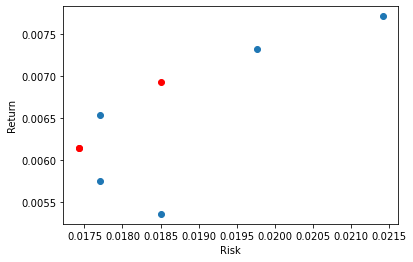

In [90]:
# 4. Plot the portfolios and asset classes on a graph
plt.plot([sigma, sigma1, sigma2], [r, r1, r2], 'ro')
plt.plot([sigma3, sigma4, sigma5, sigma6, sigma7], [r3, r4, r5, r6, r7], 'o')
plt.xlabel('Risk')
plt.ylabel('Return')

Text(0, 0.5, 'Return')

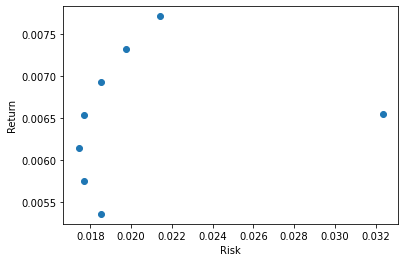

In [91]:
# 5. Plot an equal weighted portolio on the graph

w0 = [.25, .25, .25, .25]
w0 = w0/np.sum(w0) #normalize
#print("weights =", w0)
r0 = np.matmul(w0,m.transpose())
#print("return =", r0)
var0 = np.matmul(w0,np.matmul(C,w0.transpose()))
sigma0 = np.sqrt(var0)
#print("risk =", sigma0)

plt.plot([sigma0, sigma1, sigma2, sigma3, sigma4, sigma5, sigma6, sigma7], [r0, r1, r2, r3, r4, r5, r6, r7], 'o')
plt.xlabel('Risk')
plt.ylabel('Return')

In [92]:
# 6. What is the expected return and risk of the minimum variance portfolio
print("return =", r)
print("risk =", sigma)

return = 0.006143974980755603
risk = 0.01742209834422105


## <span style="color:blue">Part 5: Calculate the beta (t-stat, R-square) of each the risk asset class to the following 2 'market' portfolios   </span>

  Market Portfolio 1: "MSCI AC WORLD"    
  Market Portfolio 2: "MSCI USA"
  
  Compare the betas for each asset class


In [93]:
import statsmodels.api as sm
world = sm.add_constant(indata["MSCI AC WORLD"])
usa = sm.add_constant(indata["MSCI USA"])

# MSCI EUROPE
print("MSCI EUROPE - MSCI AC WORLD")
model = sm.OLS(indata["MSCI EUROPE"], world)
results = model.fit()
print('beta: ', (results.params).tolist()[1])
print('t-stat: ', (results.tvalues).tolist()[1])
print('R-square: ', results.rsquared)

print("\nMSCI EUROPE - MSCI USA")
model = sm.OLS(indata["MSCI EUROPE"], usa)
results = model.fit()
print('beta: ', (results.params).tolist()[1])
print('t-stat: ', (results.tvalues).tolist()[1])
print('R-square: ', results.rsquared)

# MSCI USA
print("\nMSCI USA - MSCI AC WORLD")
model = sm.OLS(indata["MSCI USA"], world)
results = model.fit()
print('beta: ', (results.params).tolist()[1])
print('t-stat: ', (results.tvalues).tolist()[1])
print('R-square: ', results.rsquared)

print("\nMSCI USA - MSCI USA")
model = sm.OLS(indata["MSCI USA"], usa)
results = model.fit()
print('beta: ', (results.params).tolist()[1])
print('t-stat: ', (results.tvalues).tolist()[1])
print('R-square: ', results.rsquared)

# MSCI PACIFIC
print("\nMSCI PACIFIC - MSCI AC WORLD")
model = sm.OLS(indata["MSCI PACIFIC"], world)
results = model.fit()
print('beta: ', (results.params).tolist()[1])
print('t-stat: ', (results.tvalues).tolist()[1])
print('R-square: ', results.rsquared)

print("\nMSCI PACIFIC - MSCI USA")
model = sm.OLS(indata["MSCI PACIFIC"], usa)
results = model.fit()
print('beta: ', (results.params).tolist()[1])
print('t-stat: ', (results.tvalues).tolist()[1])
print('R-square: ', results.rsquared)

# Treasury.Bond.10Y
print("\nTreasury.Bond.10Y - MSCI AC WORLD")
model = sm.OLS(indata["Treasury.Bond.10Y"], world)
results = model.fit()
print('beta: ', (results.params).tolist()[1])
print('t-stat: ', (results.tvalues).tolist()[1])
print('R-square: ', results.rsquared)

print("\nTreasury.Bond.10Y - MSCI USA")
model = sm.OLS(indata["Treasury.Bond.10Y"], usa)
results = model.fit()
print('beta: ', (results.params).tolist()[1])
print('t-stat: ', (results.tvalues).tolist()[1])
print('R-square: ', results.rsquared)

# Check beta from textbook
covariance = (indata[["Treasury.Bond.10Y","MSCI USA"]]).cov()
C = covariance.to_numpy()[0,1]
sigma2 = indata["MSCI USA"].std()**2
print('\nbeta from textbook for Treasury.Bond.10Y:', C/sigma2)

MSCI EUROPE - MSCI AC WORLD
beta:  1.0524949617626282
t-stat:  42.45139757980733
R-square:  0.8389290106116958

MSCI EUROPE - MSCI USA
beta:  0.9450188010082932
t-stat:  23.318178621494766
R-square:  0.6111212376669082

MSCI USA - MSCI AC WORLD
beta:  0.844740090482762
t-stat:  36.049860786202096
R-square:  0.7897413801766296

MSCI USA - MSCI USA
beta:  1.0000000000000004
t-stat:  4.090673825338503e+16
R-square:  1.0

MSCI PACIFIC - MSCI AC WORLD
beta:  1.0381429110559721
t-stat:  25.43635860866189
R-square:  0.6515638526712682

MSCI PACIFIC - MSCI USA
beta:  0.7288630276695542
t-stat:  11.893718695090595
R-square:  0.29019896281587776

Treasury.Bond.10Y - MSCI AC WORLD
beta:  -0.039841871626824094
t-stat:  -1.6276065358566256
R-square:  0.007598192602529363

Treasury.Bond.10Y - MSCI USA
beta:  -0.022787414124747357
t-stat:  -0.882505458999167
R-square:  0.002245857732616763

beta from textbook for Treasury.Bond.10Y: -0.02278741412474732
